In [14]:
# !pip install keras_metrics

In [40]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
import keras_metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
all_seasons = pd.read_csv('../data/batters_all_seasons_master.csv')

In [4]:
X = all_seasons.drop(columns=['Name', 'playerId', 'next_game_hit'])
y = all_seasons['next_game_hit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [6]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train,
                                      length=3,
                                      batch_size=64)
test_sequences = TimeseriesGenerator(X_test_sc, y_test,
                                     length=3,
                                     batch_size=64)

In [9]:
train_sequences[0][0].shape

(64, 3, 35)

In [12]:
rnn = Sequential()

rnn.add(GRU(16, input_shape=(3, 35), return_sequences=True))
rnn.add(GRU(16, return_sequences=False))
rnn.add(Dense(8, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))

In [16]:
rnn.compile(loss='binary_crossentropy',
            optimizer=Adam(lr=.001),
            metrics=['accuracy', keras_metrics.precision()])

In [17]:
history = rnn.fit_generator(train_sequences,
                            epochs=10,
                            validation_data=test_sequences)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1537/1545 [============================>.] - ETA: 0s - loss: 0.6739 - acc: 0.5993 - precision: 0.6011

KeyError: 3

In [18]:
all_seasons.head()

,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,BB%,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,prev3_avg,prev5_avg,next_game_hit
0,Brandon Crawford,4,1,0,0,0,0,0.25,5343,0.000000,...,0.0,0.0000,0.50,0.5000,0.5,0.0000,0.5000,0.230769,0.285714,False
1,Gregor Blanco,1,0,0,0,1,0,0.00,3123,0.000000,...,0.0,0.0000,0.00,0.0000,0.0,0.0000,0.0000,0.200000,0.250000,False
2,Avisail Garcia,3,0,1,0,2,0,0.00,5760,0.333333,...,0.0,0.0000,0.00,0.0000,0.0,0.0000,0.0000,0.090909,0.105263,True
3,Denard Span,4,0,0,0,0,0,0.00,8347,0.000000,...,0.0,0.2500,0.75,0.0000,0.0,0.5000,0.5000,0.100000,0.210526,False
4,Rougned Odor,5,1,1,0,1,0,0.25,12282,0.200000,...,0.0,0.3333,0.00,0.6667,0.0,0.6667,0.3333,0.153846,0.095238,True


In [19]:
X_train_sc.shape

(98851, 35)

In [22]:
seq = Sequential()
seq.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
seq.add(Dense(32, activation='relu'))
seq.add(Dense(1, activation='sigmoid'))

In [23]:
seq.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', keras_metrics.precision()])

In [24]:
seq_history = seq.fit(X_train_sc, y_train,
                      epochs=10,
                      batch_size=128, validation_data=(X_test_sc, y_test))

Train on 98851 samples, validate on 32951 samples
Epoch 1/10
98851/98851 [==============================] - 1s 15us/step - loss: 0.6717 - acc: 0.5983 - precision: 0.6095 - val_loss: 0.6738 - val_acc: 0.5940 - val_precision: 0.6003
Epoch 2/10
98851/98851 [==============================] - 1s 11us/step - loss: 0.6676 - acc: 0.6033 - precision: 0.6105 - val_loss: 0.6729 - val_acc: 0.5936 - val_precision: 0.6000
Epoch 3/10
98851/98851 [==============================] - 1s 9us/step - loss: 0.6666 - acc: 0.6043 - precision: 0.6115 - val_loss: 0.6725 - val_acc: 0.5944 - val_precision: 0.6017
Epoch 4/10
98851/98851 [==============================] - 1s 10us/step - loss: 0.6663 - acc: 0.6052 - precision: 0.6122 - val_loss: 0.6728 - val_acc: 0.5946 - val_precision: 0.6023
Epoch 5/10
98851/98851 [==============================] - 1s 11us/step - loss: 0.6658 - acc: 0.6058 - precision: 0.6122 - val_loss: 0.6743 - val_acc: 0.5945 - val_precision: 0.6015
Epoch 6/10
98851/98851 [======================

In [25]:
seq_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'val_precision', 'loss', 'acc', 'precision'])

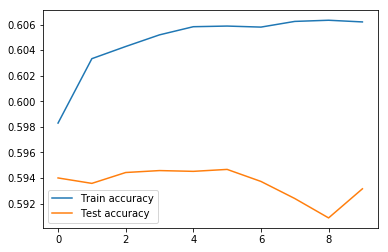

In [26]:
plt.plot(seq_history.history['acc'], label='Train accuracy')
plt.plot(seq_history.history['val_acc'], label='Test accuracy')
plt.legend();

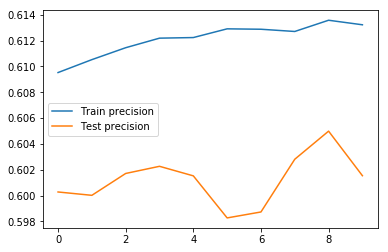

In [27]:
plt.plot(seq_history.history['precision'], label='Train precision')
plt.plot(seq_history.history['val_precision'], label='Test precision')
plt.legend();

In [33]:
seq = Sequential()
seq.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
seq.add(Dense(32, activation='relu'))
seq.add(Dense(16, activation='relu'))
seq.add(Dense(8, activation='relu'))
seq.add(Dense(1, activation='sigmoid'))

In [34]:
seq.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', keras_metrics.precision()])

In [35]:
seq_history2 = seq.fit(X_train_sc, y_train,
                      epochs=30,
                      batch_size=128, validation_data=(X_test_sc, y_test))

Train on 98851 samples, validate on 32951 samples
Epoch 1/30
98851/98851 [==============================] - 2s 17us/step - loss: 0.6718 - acc: 0.5950 - precision: 0.6049 - val_loss: 0.6727 - val_acc: 0.5927 - val_precision: 0.5971
Epoch 2/30
98851/98851 [==============================] - 1s 13us/step - loss: 0.6671 - acc: 0.6038 - precision: 0.6112 - val_loss: 0.6725 - val_acc: 0.5946 - val_precision: 0.6004
Epoch 3/30
98851/98851 [==============================] - 1s 13us/step - loss: 0.6665 - acc: 0.6049 - precision: 0.6112 - val_loss: 0.6731 - val_acc: 0.5946 - val_precision: 0.5997
Epoch 4/30
98851/98851 [==============================] - 1s 12us/step - loss: 0.6663 - acc: 0.6041 - precision: 0.6109 - val_loss: 0.6730 - val_acc: 0.5929 - val_precision: 0.6016
Epoch 5/30
98851/98851 [==============================] - 1s 12us/step - loss: 0.6659 - acc: 0.6059 - precision: 0.6130 - val_loss: 0.6725 - val_acc: 0.5937 - val_precision: 0.5971
Epoch 6/30
98851/98851 [=====================

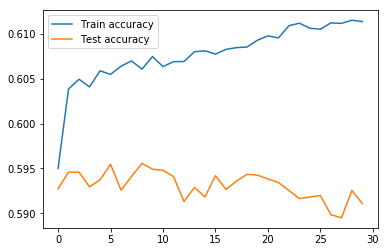

In [36]:
plt.plot(seq_history2.history['acc'], label='Train accuracy')
plt.plot(seq_history2.history['val_acc'], label='Test accuracy')
plt.legend();

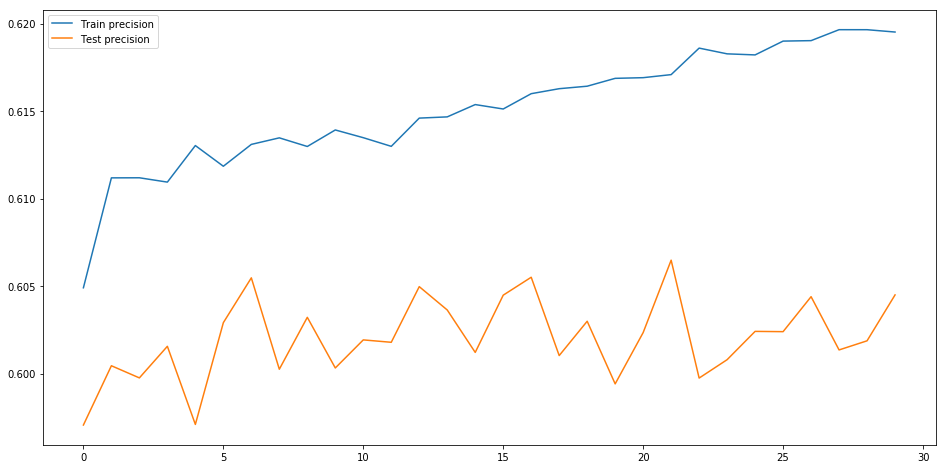

In [38]:
plt.figure(figsize=(16, 8))
plt.plot(seq_history2.history['precision'], label='Train precision')
plt.plot(seq_history2.history['val_precision'], label='Test precision')
plt.legend();

In [41]:
y_test.mean()

0.5893903068192164

In [42]:
drp = Sequential()
drp.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
drp.add(Dropout(0.3))
drp.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(0.01)))
drp.add(Dense(8, activation='relu'))
drp.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
drp.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', keras_metrics.precision()])

In [44]:
drp_history = drp.fit(X_train_sc, y_train,
                      epochs=100,
                      batch_size=128, validation_data=(X_test_sc, y_test))

Train on 98851 samples, validate on 32951 samples
Epoch 1/100
98851/98851 [==============================] - 2s 18us/step - loss: 0.8607 - acc: 0.5963 - precision: 0.6013 - val_loss: 0.6789 - val_acc: 0.5894 - val_precision: 0.5894
Epoch 2/100
98851/98851 [==============================] - 1s 13us/step - loss: 0.6737 - acc: 0.6011 - precision: 0.6011 - val_loss: 0.6785 - val_acc: 0.5894 - val_precision: 0.5894
Epoch 3/100
98851/98851 [==============================] - 1s 14us/step - loss: 0.6737 - acc: 0.6011 - precision: 0.6011 - val_loss: 0.6782 - val_acc: 0.5894 - val_precision: 0.5894
Epoch 4/100
98851/98851 [==============================] - 1s 13us/step - loss: 0.6735 - acc: 0.6011 - precision: 0.6011 - val_loss: 0.6773 - val_acc: 0.5894 - val_precision: 0.5894
Epoch 5/100
98851/98851 [==============================] - 1s 13us/step - loss: 0.6726 - acc: 0.6013 - precision: 0.6014 - val_loss: 0.6759 - val_acc: 0.5927 - val_precision: 0.5946
Epoch 6/100
98851/98851 [===============

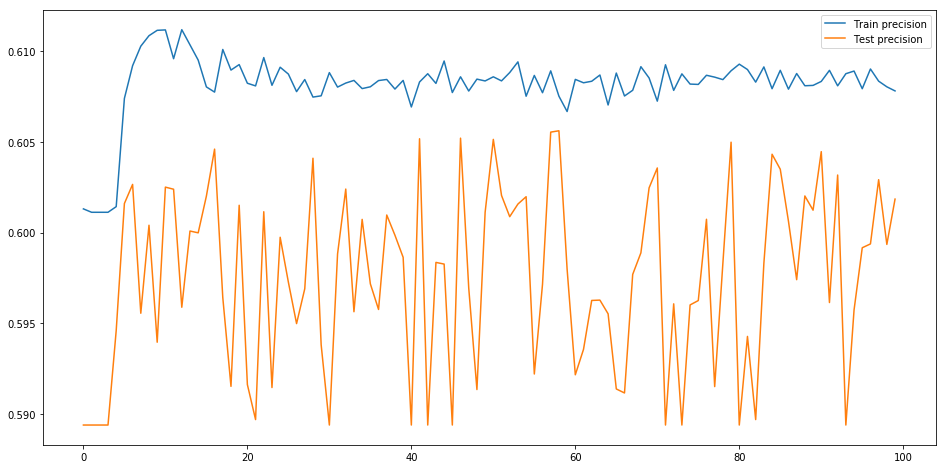

In [45]:
plt.figure(figsize=(16, 8))
plt.plot(drp_history.history['precision'], label='Train precision')
plt.plot(drp_history.history['val_precision'], label='Test precision')
plt.legend();